# Purpose
This notebook tests the naive training of the the completion network.

# Import

In [1]:
import torch
import torchvision

from glic.networks.completion_network import CompletionNetwork
from glic.training.cn_training import train_cn
from glic.utils import *

# Train

In [6]:
# load the dataset
train_dataset_dir = '../data/train/'
train_dataset = torchvision.datasets.ImageFolder(root=train_dataset_dir, transform=torchvision.transforms.ToTensor())
train_dataloader = get_dataloader(train_dataset_dir, train_dataset_dir+"airfield/00000005.jpg", batch_size=4)

In [3]:
# others
cn = CompletionNetwork().cuda()
optimizer = torch.optim.Adadelta(cn.parameters(), lr=2e-4)
num_batch = 10
replacement_val = torch.rand(3)

In [8]:
# train
loss_list = train_cn(cn, optimizer, train_dataloader, num_batch, replacement_val)


### BATCH 0 ###
loss: 1688.046630859375

### BATCH 1 ###
loss: 3004.6083984375

### BATCH 2 ###
loss: 3795.12451171875

### BATCH 3 ###
loss: 2461.693115234375

### BATCH 4 ###
loss: 3351.41796875

### BATCH 5 ###
loss: 2332.5244140625

### BATCH 6 ###
loss: 2617.118896484375

### BATCH 7 ###
loss: 2208.16357421875

### BATCH 8 ###
loss: 2296.744140625

### BATCH 9 ###
loss: 3847.4267578125


In [9]:
# save checkpoint
resume_path = update_resume_path(train_dataset_dir, "../data/train/airfield/00000001.jpg", num_batch, 4)
save_checkpoint("../logs/checkpoints/",
    cn,
    optimizer,
    [loss_list],
    num_batch,
    resume_path,
    replacement_val=replacement_val)

# Monitor the training

Path to resume training:  ../data/train/alcove/00004721.jpg


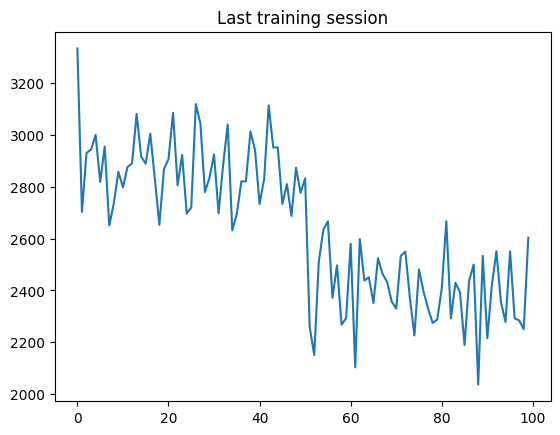

In [4]:
loss_list, batch, resume_path, replacement_val = load_checkpoint(
        "../logs/checkpoints/", cn, optimizer
    )

import matplotlib.pyplot as plt
plt.plot(loss_list[-1])
plt.title("Last training session")

print("Total number of batch: ",batch)
print("Path to resume training: ",resume_path)